***Akanksha C. Khandare*** 

***Assignment 14 Random forest***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:

# Load dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")



***EDA***

In this step, we explore the dataset to understand its structure, data types, and overall quality.
We check for missing values, data inconsistencies, and outliers that may affect model performance.
Descriptive statistics like mean, median, and standard deviation help summarize feature distributions.

In [40]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Dataset Shape: (214, 10)

First 5 rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes:

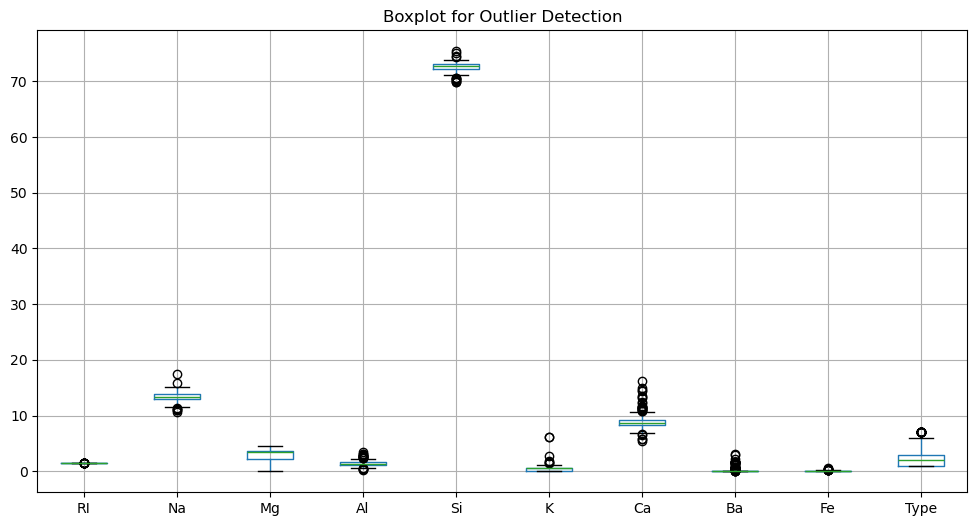

In [41]:
# Step 3: Check for outliers (Boxplot)
plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

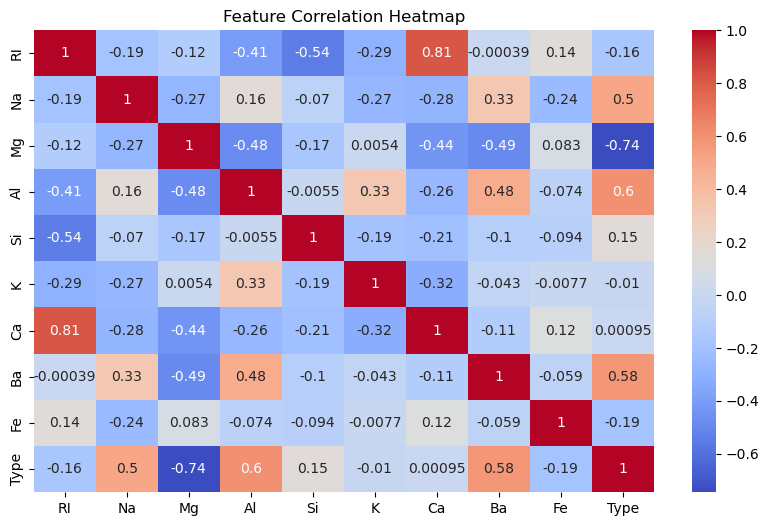

In [42]:
# Step 4: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


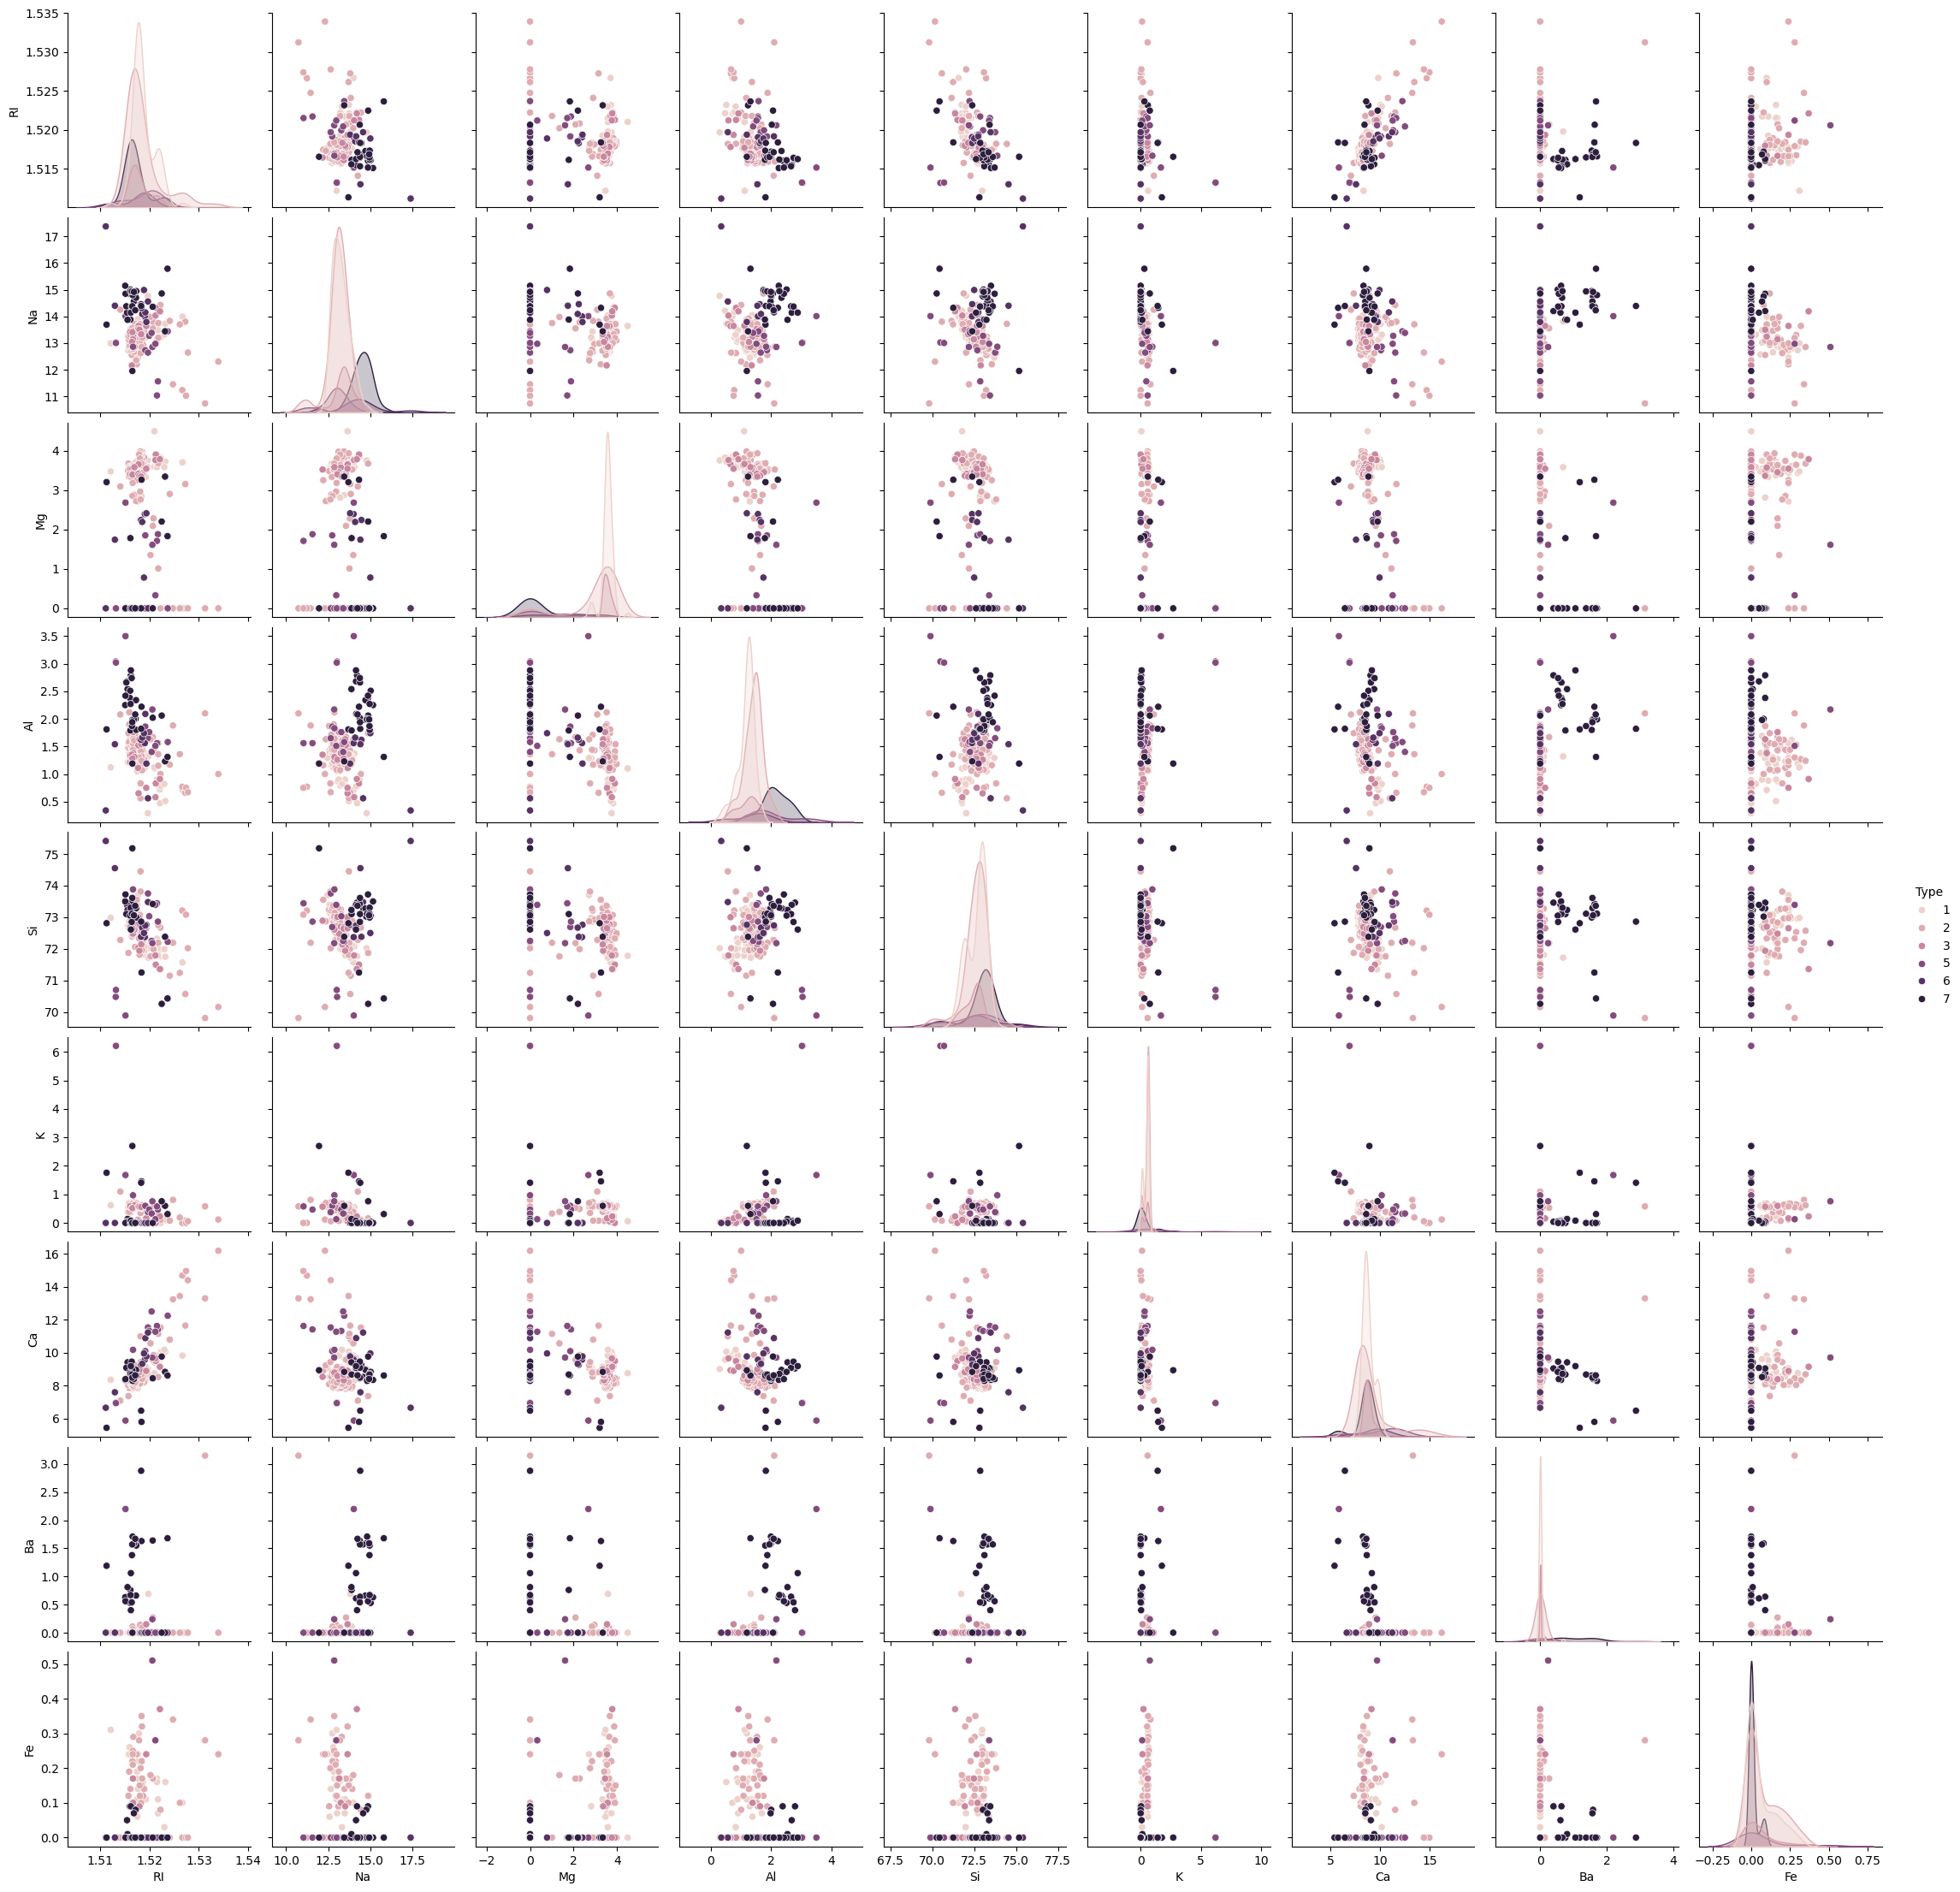

In [43]:
# Step 5: Pairplot to visualize relationships
sns.pairplot(df, hue='Type')
plt.show()

Visualizations help us better understand data patterns and relationships.
We use histograms and boxplots to detect data distribution and outliers.
Correlation heatmaps and pairplots show how features are related and help identify which features may be most important for classification.

***Data preprocessingn***

In [44]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [45]:
# Feature scaling
X = df.drop('Type', axis=1)
y = df['Type']


In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Data preprocessing ensures the dataset is clean and ready for modeling.
We handle missing values (none found here), check for categorical data (none in this dataset), and apply feature scaling using StandardScaler.
Scaling standardizes all features to a similar range, improving the performance of distance-based and tree-based models.

***Train test split***

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

***Random forest***

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)






RandomForestClassifier(random_state=42)

The Random Forest algorithm builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.
We split the dataset into training and testing sets, train the model, and evaluate it using accuracy, precision, recall, and F1-score.
This provides a robust baseline for comparison with other ensemble methods.

In [52]:
y_pred = rf.predict(X_test)


🔹 Random Forest Results:
Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



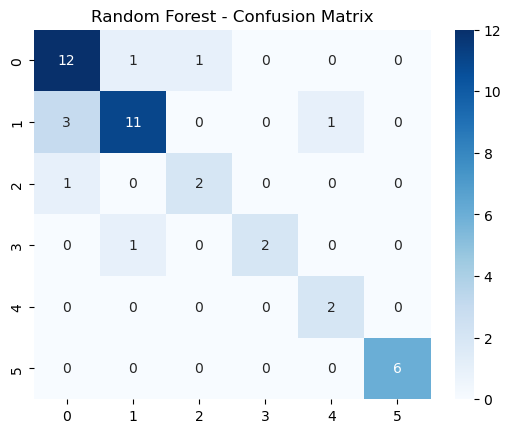

In [53]:

print("\n🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

***Bagging classifier***

In [54]:
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_bag = bagging.predict(X_test)

print("\n🔹 Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_bag))
print("\nClassification Report:\n", classification_report(y_test, y_bag))


🔹 Bagging Results:
Accuracy: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.75      0.76        43
weighted avg       0.82      0.79      0.79        43



***Boosting***

In [55]:
boost = AdaBoostClassifier(n_estimators=100, random_state=42)
boost.fit(X_train, y_train)
y_boost = boost.predict(X_test)

print("\n🔹 AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_boost))
print("\nClassification Report:\n", classification_report(y_test, y_boost))


🔹 AdaBoost Results:
Accuracy: 0.3953488372093023

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.14      0.24        14
           2       0.36      0.60      0.45        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.67      1.00      0.80         2
           7       0.67      0.67      0.67         6

    accuracy                           0.40        43
   macro avg       0.39      0.40      0.36        43
weighted avg       0.47      0.40      0.36        43



***Gradient boosting***

In [56]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)

print("\n🔹 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_gb))
print("\nClassification Report:\n", classification_report(y_test, y_gb))


🔹 Gradient Boosting Results:
Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.81      0.87      0.84        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



***Compare model performance***

In [57]:
models = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost']
accuracy_scores = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_bag),
    accuracy_score(y_test, y_boost),
    accuracy_score(y_test, y_gb)
]



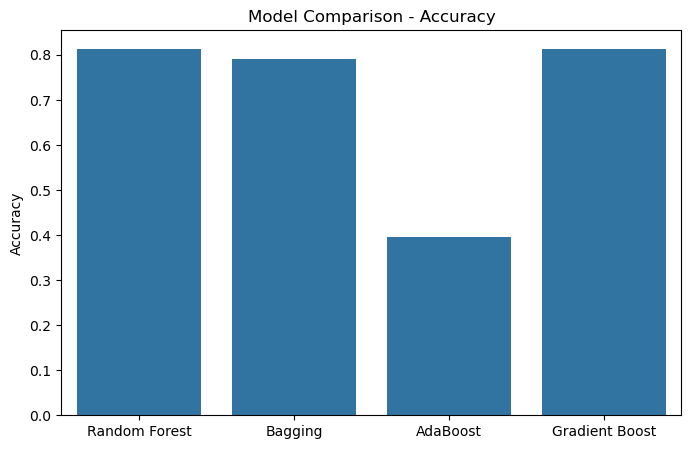

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracy_scores)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

Bagging (Bootstrap Aggregating) trains multiple models on different subsets of data and averages their results to reduce variance.
Boosting, on the other hand, builds models sequentially, where each model focuses on correcting the errors of the previous one.
We apply Bagging, AdaBoost, and Gradient Boosting and compare their accuracies with Random Forest to see which ensemble performs best.

***Questions***

1. Explain Bagging and Boosting methods. How is it different from each other.

***Bagging***

Bagging is an ensemble learning technique that builds multiple models on different random subsets of the training data.

Each subset is created using bootstrapping — sampling with replacement from the original dataset.

All models (usually Decision Trees) are trained independently and in parallel.

The final output is obtained by combining their predictions through majority voting (for classification) or averaging (for regression).

Bagging helps to reduce variance and makes the model more stable and less prone to overfitting.

Example: Random Forest is a well-known Bagging-based algorithm.

***Boosting***

Boosting is an ensemble method that builds models sequentially, where each new model tries to correct the errors of the previous ones.

It assigns higher weights to misclassified samples so that the next model focuses more on difficult cases.

The predictions from all models are combined using a weighted approach to produce the final output.

Boosting helps to reduce both bias and variance, leading to improved overall accuracy.

However, it can be more sensitive to noise and outliers if not properly tuned.

Examples of Boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

***Main Difference (Pointwise)***

Bagging trains models independently and in parallel, while Boosting trains them sequentially.

Bagging focuses on reducing variance, whereas Boosting focuses on reducing bias.

In Bagging, all models contribute equally to the final result; in Boosting, models are weighted based on their performance.

Bagging uses random sampling with replacement, while Boosting adjusts sample weights after each iteration.

Bagging is more stable and less likely to overfit, while Boosting can achieve higher accuracy but may overfit noisy data.

2.Explain how to handle imbalance in the data.

Imbalanced data occurs when one or more classes in a dataset have significantly fewer samples than others (e.g., 90% class A and 10% class B). This can cause the model to become biased toward the majority class and perform poorly on minority classes.

To handle imbalance, several techniques can be used:

***a) Resampling Methods:***

Oversampling the minority class (e.g., duplicating or using SMOTE – Synthetic Minority Over-sampling Technique).

Undersampling the majority class to reduce dominance.

***b) Class Weight Adjustment:***

Many algorithms (like Random Forest, Logistic Regression) allow setting class_weight='balanced' so that misclassifying minority samples is penalized more.

***c) Ensemble Methods:***

Use algorithms like Balanced Random Forest or EasyEnsemble, which are designed to handle imbalanced data.

It’s important to evaluate models using metrics such as Precision, Recall, F1-score, and ROC-AUC, instead of just accuracy, because accuracy can be misleading on imbalanced datasets.